## Unveiling the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pytesseract
from PIL import Image

#### What is in it?

In [3]:
data = pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t')

/home/silvsilva/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,17,18,19,20,24,25,26,28,44,49,52,61) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,100g,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
 [col_name for col_name in data.columns]

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_

In [69]:
data = data[data.countries_en == 'United States']
data = data[['product_name', 'countries_en', 'image_ingredients_url', 'ingredients_text']]
data = data[data.image_ingredients_url.notnull() & data.ingredients_text.notnull()].reset_index()
data.image_ingredients_url[0]

'https://static.openfoodfacts.org/images/products/000/093/933/3330/ingredients_en.9.400.jpg'

In [76]:
from skimage import io

In [77]:
image = io.imread(data.image_ingredients_url[0])

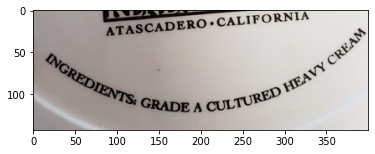

In [79]:
plt.imshow(image)

In [82]:
data.ingredients_text[0]

'INGREDIENTS: GRADE A CULTURED HEAVY CREAM'

In [93]:
data.ingredients_text[data.product_name == 'Pepperidge farm crackers'][373]

'Made with Smiles and Unbleached Enriched Wheat Flour (Flour, Niacin, Reduced Iron, Thiamine Mononitrate [Vitamin B1], Riboflavin [Vitamin B2], Folic Acid), Cheddar Cheese ([Cultured Milk, Salt, Enzymes], Annatto), Vegetable Oils (Canola, Sunflower and/or Soybean), Contains 2 Percent or Less of: Salt, Yeast, Sugar, Autolzed Yeast, Leavening (Baking Soda, Monocalcium Phosphate, Ammonium Bicarbonate), Paprika, Spices (Contains Celery), and Dehydrated Onions.'

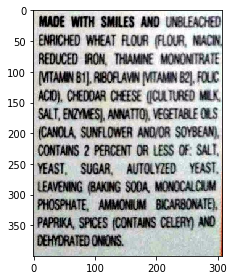

In [97]:
io.imshow(data[data.product_name == 'Pepperidge farm crackers']['image_ingredients_url'][373])

In [81]:
pytesseract.image_to_string(image)

OSError: [Errno 12] Cannot allocate memory

In [74]:
len(data)

6600